In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Load Dataset

In [3]:
X_train = pickle.load(open('../Data/X_train.pkl', 'rb'))
X_test = pickle.load(open('../Data/X_test.pkl', 'rb'))
y_train = pickle.load(open('../Data/y_train.pkl', 'rb'))
y_test = pickle.load(open('../Data/y_test.pkl', 'rb'))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(329, 20530)
(83, 20530)
(329,)
(83,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)

[[-0.48855657  0.12112708 -0.33372349 ...  0.04735987  0.50779996
  -0.02217494]
 [ 0.83092164  1.17948768 -0.33372349 ...  0.18754437  0.77965228
  -0.17205193]
 [-1.861054   -0.69352094 -0.33372349 ... -0.35346398 -2.00005787
   3.63814136]
 ...
 [ 1.50287947  0.88173571  0.1048791  ... -0.33180584  0.91213697
  -0.14253948]
 [-0.06583194  0.60359346 -0.33372349 ...  0.20030191  0.44110666
  -1.31512921]
 [-0.87784052 -0.01478846 -0.33372349 ...  0.12805867  1.46177518
  -0.6430939 ]]


## Grid search for finding best parameters

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
parameters = [{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
              {'C': [0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

# Create a GridSearchCV object
search = GridSearchCV(SVC(probability=True), parameters, n_jobs=-1, verbose=2, cv=3)

# Fit the grid search to the data
search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             verbose=2)

In [18]:
best_params = search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.1, 'kernel': 'linear'}


## Picking the best model

In [19]:
best_model = search.best_estimator_
best_model

SVC(C=0.1, kernel='linear', probability=True)

## Quick check on all the models

In [20]:
search.cv_results_

{'mean_fit_time': array([ 6.4832631 ,  6.91011484,  6.69377446,  6.96349382, 16.36451634,
        15.41631118, 15.63620687, 15.30879482, 15.46877948, 15.02894227,
        14.53512247, 14.92517376, 15.13580863, 15.60989873, 14.66651575,
        14.52046537, 15.23705983, 15.22456868, 15.28020716, 15.01477464,
        14.80035106, 14.86295168, 14.8865118 , 15.42144926, 15.48281034,
        15.50226378, 14.43480047, 15.75473777, 15.46815769, 15.70540857,
        15.10157839, 16.41867153, 14.88483874, 15.28381515, 14.9883438 ,
        14.8856678 , 13.55242411, 11.93680453, 10.88538631, 10.20973818]),
 'std_fit_time': array([0.23016315, 0.4613792 , 0.50731852, 0.66449312, 0.59627864,
        0.4701285 , 0.54214807, 0.15592302, 0.54618889, 0.52976862,
        0.25376339, 0.13630367, 0.34563526, 0.63973952, 0.04180862,
        0.12517951, 0.58542019, 0.62331567, 0.60615732, 0.62871642,
        0.13378455, 0.34413845, 0.10386697, 0.56981216, 1.08470905,
        1.35371204, 0.15414635, 1.0141844

## Evaluating the best model

In [22]:
best_score = search.best_score_     # this is train accuracy
print("Best Score:", best_score)    

Best Score: 0.9392549346677788


### Test accuracy

In [23]:
from sklearn.metrics import accuracy_score

y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 0.927710843373494


### AUC score

In [24]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_pred_test)
print("AUC Score:", auc_score)

AUC Score: 0.8600746268656717


### ROC curve

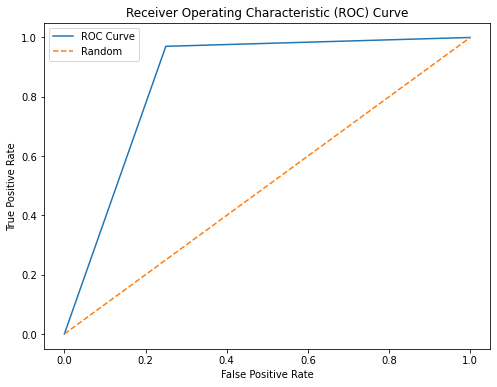

In [14]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Confusion matrix and classification report

In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test)

array([[12,  4],
       [ 2, 65]], dtype=int64)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.94      0.97      0.96        67

    accuracy                           0.93        83
   macro avg       0.90      0.86      0.88        83
weighted avg       0.93      0.93      0.93        83



## Saving the model

In [27]:
dict = {
    'Model': best_model,
    'Best Parameters': best_params,
    'Training Set Accuracy': best_score,
    'Test Set Accuracy': test_accuracy,
    'AUC Score': auc_score
}

# save the dictionary to a pickle file
import pickle

with open('SVM_all_dim.pkl', 'wb') as f:
    pickle.dump(dict, f)

### Load to verify

In [28]:
import pickle

with open('SVM_all_dim.pkl', 'rb') as f:
    dict = pickle.load(f)

print(dict)

{'Model': SVC(C=0.1, kernel='linear', probability=True), 'Best Parameters': {'C': 0.1, 'kernel': 'linear'}, 'Training Set Accuracy': 0.9392549346677788, 'Test Set Accuracy': 0.927710843373494, 'AUC Score': 0.8600746268656717}


# Working with Synthesized data

In [29]:
X = pickle.load(open('../Data/syn_X.pkl', 'rb'))
y = pickle.load(open('../Data/syn_y.pkl', 'rb'))

print(X.shape)
print(y.shape)

(664, 20530)
(664,)


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(531, 20530)
(133, 20530)
(531,)
(133,)


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)

[[ 0.42952517 -0.33042151 -0.35898548 ... -0.76234968  0.79330395
   0.56251064]
 [-1.99408559 -0.84467905 -0.35898548 ... -0.38613577 -2.05702242
   3.56104178]
 [ 0.19391275 -0.62982671 -0.35898548 ...  0.33234016  0.79108886
   0.22305918]
 ...
 [-0.01289469 -0.24519182 -0.35898548 ...  0.5717909   1.15579934
  -0.58644669]
 [-0.76846654 -0.95403625  0.16195981 ... -1.77998653 -0.21821792
  -0.9816537 ]
 [ 0.18134164  0.33438208 -0.35898548 ... -0.10920102  1.6708186
  -0.16431597]]


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
parameters = [{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
              {'C': [0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

# Create a GridSearchCV object
search = GridSearchCV(SVC(probability=True), parameters, n_jobs=-1, verbose=2, cv=3)

# Fit the grid search to the data
search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             verbose=2)

In [33]:
best_params = search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.1, 'kernel': 'linear'}


In [34]:
best_model = search.best_estimator_
best_model

SVC(C=0.1, kernel='linear', probability=True)

In [35]:
best_score = search.best_score_     # this is train accuracy
print("Best Score:", best_score)    

Best Score: 0.9661016949152543


In [36]:
from sklearn.metrics import accuracy_score

y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 0.9924812030075187


In [37]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_pred_test)
print("AUC Score:", auc_score)

AUC Score: 0.9925373134328358


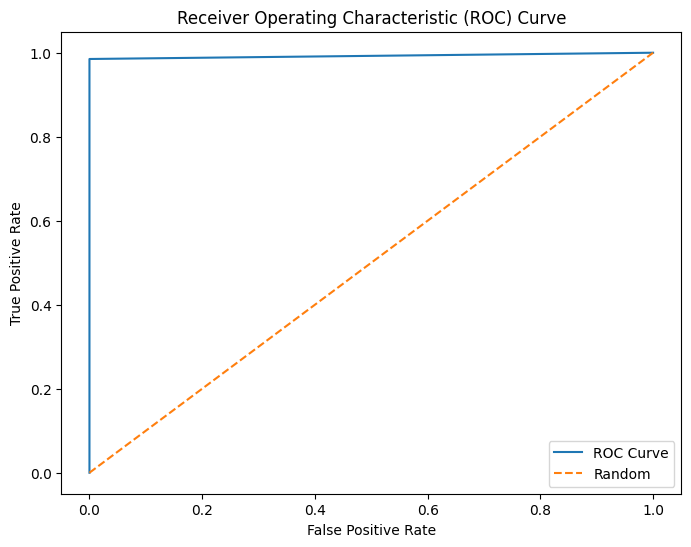

In [38]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test)

array([[66,  0],
       [ 1, 66]], dtype=int64)

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        66
           1       1.00      0.99      0.99        67

    accuracy                           0.99       133
   macro avg       0.99      0.99      0.99       133
weighted avg       0.99      0.99      0.99       133

